<a href="https://colab.research.google.com/github/KharchenkoAnastasia/customer_analysis_grocery_chain/blob/main/customer_analysis_grocery_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of customers of a chain of grocery stores

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
# Define the path to the Excel file
path_to_file = '/content/Grocery Database.xlsx'

# Load the Excel file
excel_file = pd.ExcelFile(path_to_file)

# Retrieve and display the sheet names
sheet_names = excel_file.sheet_names
print(sheet_names)

['Grosto DB', 'Fact Summary']


In [35]:
# Parse the 'Fact Summary' sheet into a DataFrame
fact_summary_df = excel_file.parse('Fact Summary')

# Display the first few rows to verify the content
print(fact_summary_df.head())

   S.No.     Column Name Description of the Column names
0      1  Receipt Number              Transaction Number
1      2            Date             Date of Transaction
2      3            Year             Year of Transaction
3      4           Month            Month of Transaction
4      5            Time         Time of the transaction


In [36]:
# Read the Excel file into a DataFrame and display the first 10 rows
df = pd.read_excel(path_to_file)
print(df.head(10))

  Receipt Number       Date  Year  Month      Time  Mobile Number  \
0       GIJ00001 2016-01-02  2016      1  0.422260     9793548581   
1       GIJ00002 2016-01-02  2016      1  0.657533     9938441276   
2       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
3       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
4       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
5       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
6       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
7       GIJ00003 2016-01-02  2016      1  0.478382     9976742552   
8       GIJ00004 2016-01-03  2016      1  0.870089     9800896004   
9       GIJ00004 2016-01-03  2016      1  0.870089     9800896004   

  Membership ID  Loyalty Card Points  Age  Gender  ...  GST Gross Bill Amount  \
0     MIDID0001                    1   36    Male  ...  0.1          13.32408   
1     MIDID0002                    2   54    Male  ...  0.1          25.26480 

In [19]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 50447 rows and 32 columns.


In [20]:
# Display a concise summary of the dataset, showing column data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  float64       
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-



> There are no missing values ​​in the dataframe.



In [21]:
# Group the data by 'Membership ID' and calculate the count of each membership
df.groupby("Membership ID").size()

,0
Membership ID,
MIDID0001,38
MIDID0002,30
MIDID0003,31
MIDID0004,50
MIDID0005,27
...,...
MIDSG1278,3
MIDSG1279,2
MIDSG1280,4


### **What is the distribution of customer purchases over the years?**

In [37]:
# Create a cross-tabulation to analyze the frequency of 'Membership ID' across different years
pd.crosstab(df['Year'], df['Membership ID'])

Membership ID,MIDID0001,MIDID0002,MIDID0003,MIDID0004,MIDID0005,MIDID0006,MIDID0007,MIDID0008,MIDID0009,MIDID0010,...,MIDSG1273,MIDSG1274,MIDSG1275,MIDSG1276,MIDSG1277,MIDSG1278,MIDSG1279,MIDSG1280,MIDSG1281,MIDSG1282
Year,,,,,,,,,,,,,,,,,,,,,
2016,6,1,6,10,4,1,6,12,2,11,...,0,0,0,0,0,0,0,0,0,0
2017,8,3,0,26,11,22,1,9,7,1,...,6,0,0,0,0,0,0,0,0,0
2018,9,5,12,0,2,20,0,21,12,6,...,9,2,9,1,2,0,0,0,0,0
2019,15,21,13,14,10,9,7,9,2,7,...,0,7,0,10,1,3,2,4,7,7


  

> In total, the data frame contains data on 2,601 unique customers for the period 2016-2019. Accordingly, there are old and new customers who have different shopping experiences in the studied chain of stores.



### **Does the structure of customer spending in the studied retail chain differ in the two reference years - 2016 and 2019?**

In [29]:
# Calculate the total amount including GST, group by Category and Year, and round the result
df_result = (
    df
    .assign(
        sum_amount_with_gst=df["Amount"] * (1 + df["GST"])  # Calculate Amount with GST
    )
    .groupby(["Category", "Year"], as_index=False)          # Group by Category and Year
    .agg(
        total_sum_amount=("sum_amount_with_gst", "sum")     # Sum the calculated values
    )
    .assign(
        total_sum_amount=lambda x: x["total_sum_amount"].round(2)  # Round to 2 decimals
    )
)

print(df_result)

                     Category  Year  total_sum_amount
0          Bakery & Breakfast  2016          12386.74
1          Bakery & Breakfast  2017          12716.33
2          Bakery & Breakfast  2018          14593.48
3          Bakery & Breakfast  2019          17999.04
4                      Beauty  2016          16821.72
..                        ...   ...               ...
59  Rice & Cooking Essentials  2019           4334.40
60     Wines, Beers & Spirits  2016           7209.02
61     Wines, Beers & Spirits  2017           8643.73
62     Wines, Beers & Spirits  2018           9323.46
63     Wines, Beers & Spirits  2019          12420.13

[64 rows x 3 columns]


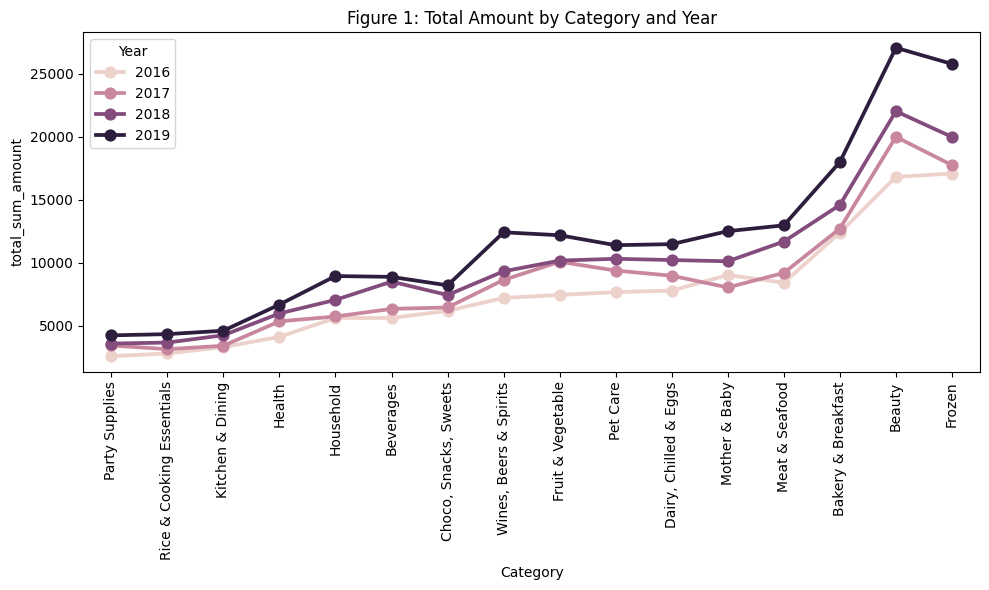

In [31]:
# Create a point plot to visualize total amount by category and year
plt.figure(figsize=(10, 6))

sns.pointplot(
    data=df_result.sort_values(by="total_sum_amount"),
    x="Category",
    y="total_sum_amount",
    hue="Year",
    linestyles="-"
)

plt.xticks(rotation=90)
plt.title("Figure 1: Total Amount by Category and Year")

plt.tight_layout()
plt.show()


### **Does the number of transactions and the average check size depend on the age (including different genders) of the client?**

In [28]:
# Group by client identifier, gender, and age to calculate metrics
avg_bill_by_client = df.groupby(["Membership ID", "Age", "Gender"]).agg(
    total_gross_bill=("Gross Bill Amount", "sum"),
    transaction_count=("Receipt Number", "count")
).reset_index()

# Calculate average bill per client
avg_bill_by_client["average_bill"] = (
    avg_bill_by_client["total_gross_bill"] / avg_bill_by_client["transaction_count"]
)

# Split data by gender
women_df = avg_bill_by_client[avg_bill_by_client["Gender"] == "Female"]
men_df = avg_bill_by_client[avg_bill_by_client["Gender"] == "Male"]

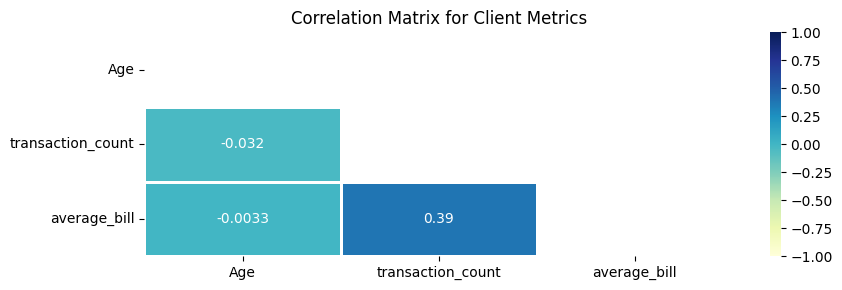

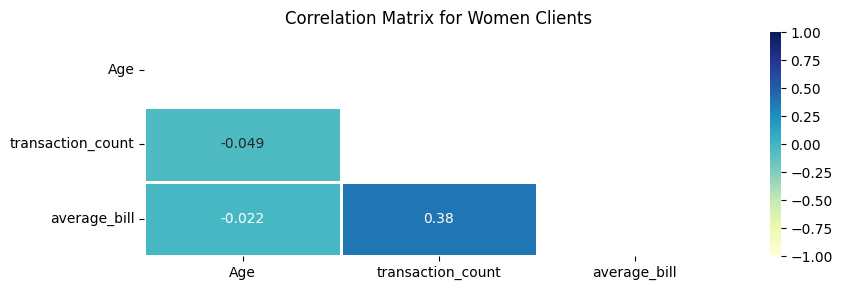

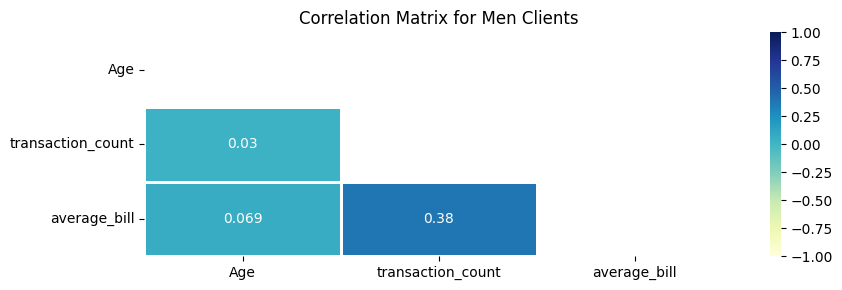

In [26]:
# Function to calculate correlation matrix and plot heatmap
def plot_correlation_heatmap(dataframe, title):
    """
    Plots a correlation heatmap for the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The input dataframe containing numeric columns.
    title (str): Title of the heatmap.
    """
    correlation_matrix = dataframe.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create the heatmap
    plt.figure(figsize=(9, 3))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        linewidths=0.8,
        mask=mask,
        cmap="YlGnBu",
        vmin=-1,
        vmax=1
    )
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(
    avg_bill_by_client[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Client Metrics"
)

plot_correlation_heatmap(
    women_df[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Women Clients"
)

plot_correlation_heatmap(
    men_df[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Men Clients"
)


###  Which countries and cities give the most profit?

In [39]:
# Group by 'Country' and 'City', calculate the sum of 'Profit Margin'
df.groupby(['Country', 'City'])['Profit Margin'].sum().sort_values(ascending=False)

,,Profit Margin
Country,City,
Singapore,Bedok,14649.59575
Philippines,Manila,14455.63346
Malaysia,Kuala Lumpur,12958.11534
Indonesia,Jakarta,11068.59512
Singapore,Woodlands,7489.29808




> Most profitable countries are Singapore and the Philippines. The cities of Bedok and Manila are the most profitable.

